# Advent of Code - Day 14 Year 2024

In [405]:
DAY = 14
YEAR = 2024
#######
import json
import sys 
sys.path.append('../../')
from utils import get_pb_data, rephrase_pb, open_link, render_json
link, data, exmp, ae1, ae2, exmps, out = get_pb_data(DAY, YEAR)

print(f'problem link: {link}')

nb examples: 1
problem link: https://adventofcode.com/2024/day/14


In [406]:
# with open("./_puzzle_data.json", "r") as f: inp = json.loads(f.read())
# render_json(inp)

In [407]:
#await rephrase_pb(DAY, YEAR, 1)

In [408]:
dat = exmp 
len(dat.splitlines())

12

In [409]:
print(dat)

p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3


- I'll need to determine the equation of each robot line. Once I have that I get their position after 100 seconds easily.

- Their movement equation is a combination of 2 directions: horizontal and vertical.


- parse the input
- determine the equation for each (x,y) of the robot (x = a1t + b1, y=a2t + b2)
- run (x,y) modulo the width, height of the grid
- count the number of robots per tile --> grid of numbers
- divide the resulting grid in 4 quadrants
- sum the nb of robots per quadrant
- multiply each number for the final result

for each robot I want :

((a1,b1), (a2,b2))

In [410]:
s = "p=0,4 v=3,-3"
x0, y0 = 0,4
ax, ay = 3, -3
# x0 = bx because x = ax*t + bx (t=0)
# y0 = by


In [411]:
s2 = s.split(' ')
s2

['p=0,4', 'v=3,-3']

In [412]:
s3 = s2[1].split('=')
s3

['v', '3,-3']

In [413]:
[int(s4) for s4 in s3[1].split(',')]

[3, -3]

In [414]:
[[int(s4) for s4 in s2.split('=')[1].split(',')] for s2 in s.split(' ')]

[[0, 4], [3, -3]]

In [415]:
lines = dat.splitlines()
ps = [[[int(s4) for s4 in s2.split('=')[1].split(',')] for s2 in s.split(' ')] for s in lines]
d = [((p[1][0], p[0][0]), (p[1][1], p[0][1])) for p in ps]
d

[((3, 0), (-3, 4)),
 ((-1, 6), (-3, 3)),
 ((-1, 10), (2, 3)),
 ((2, 2), (-1, 0)),
 ((1, 0), (3, 0)),
 ((-2, 3), (-2, 0)),
 ((-1, 7), (-3, 6)),
 ((-1, 3), (-2, 0)),
 ((2, 9), (3, 3)),
 ((-1, 7), (2, 3)),
 ((2, 2), (-3, 4)),
 ((-3, 9), (-3, 5))]

In [416]:
def _fmt(dat):
    lines = dat.splitlines()
    ps = [[[int(s4) for s4 in s2.split('=')[1].split(',')] for s2 in s.split(' ')] for s in lines]
    d = [((p[1][0], p[0][0]), (p[1][1], p[0][1])) for p in ps]
    return d

In [417]:
dat = exmp 
eqs = _fmt(dat)
eqs

[((3, 0), (-3, 4)),
 ((-1, 6), (-3, 3)),
 ((-1, 10), (2, 3)),
 ((2, 2), (-1, 0)),
 ((1, 0), (3, 0)),
 ((-2, 3), (-2, 0)),
 ((-1, 7), (-3, 6)),
 ((-1, 3), (-2, 0)),
 ((2, 9), (3, 3)),
 ((-1, 7), (2, 3)),
 ((2, 2), (-3, 4)),
 ((-3, 9), (-3, 5))]

In [418]:
X, Y = eqs[-2]
ax, bx = X 
ay, by = Y
t = 5 
x = ax*t+bx
y = ay*t+by

In [419]:
x%11

1

In [420]:
y%7

3

In [421]:
def _p(Z, t, l):
    a, b = Z
    return (a*t+b)%l 

In [422]:
def _pos(param, t, w, h):
    X, Y = param 
    return (_p(X, t, w), _p(Y, t, h))

In [423]:
dat = exmp 
params = _fmt(dat)
p = params[-2]
_pos(p, 5, 11, 7)

(1, 3)

In [424]:
t = 100
w = 11
h = 7
fpos = [_pos(p, t,w,h) for p in params]
fpos

[(3, 5),
 (5, 4),
 (9, 0),
 (4, 5),
 (1, 6),
 (1, 3),
 (6, 0),
 (2, 3),
 (0, 2),
 (6, 0),
 (4, 5),
 (6, 6)]

In [425]:
grid = [[0 for _ in range(w)] for _ in range(h)]
for x,y in fpos:
    grid[y][x] += 1
grid

[[0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [426]:
def _grid(fpos):
    grid = [[0 for _ in range(w)] for _ in range(h)]
    for x,y in fpos:
        grid[y][x] += 1
    return grid

In [427]:
g = _grid(fpos)
g

[[0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [428]:
[[grid[j][i] for i in range(w//2)] for j in range(h//2)]

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]]

In [429]:
ancx = [range(0, w//2), range(w//2+1, w)]
ancy = [range(0, h//2), range(h//2+1, h)]

In [430]:
[[[grid[j][i] for i in itx] for j in ity] for ity in ancy for itx in ancx]

[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]],
 [[2, 0, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 1, 2], [0, 1, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]]]

In [431]:
def _quad(grid):
    w, h = len(grid[0]), len(grid)
    ancx = [range(0, w//2), range(w//2+1, w)]
    ancy = [range(0, h//2), range(h//2+1, h)]
    return [[[grid[j][i] for i in itx] for j in ity] for ity in ancy for itx in ancx]

In [432]:
g = _grid(fpos)
_quad(g)

[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]],
 [[2, 0, 0, 1, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 1, 2], [0, 1, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]]]

In [433]:
nbs = [sum([x for l in q for x in l]) for q in _quad(g)]
nbs

[1, 3, 4, 1]

In [434]:
import math 
math.prod(nbs)

12

In [435]:
def sol1(dat, t, w, h):
    params = _fmt(dat)
    fpos = [_pos(p,t,w,h) for p in params]
    g = _grid(fpos)
    nbs = [sum([x for l in q for x in l]) for q in _quad(g)]
    return math.prod(nbs)
    
    
    

In [436]:
dat, t, w, h = exmp, 100, 11, 7 
sol1(dat, t, w, h)

12

In [437]:
dat, t, w, h = data, 100, 101, 103 
sol1(dat, t, w, h)

222901875

## part 2

In [438]:
#await rephrase_pb(DAY, YEAR, 2)

In [439]:
dat, t, w, h = exmp, 100, 11, 7 
t = -1

In [440]:
t += 1
params = _fmt(dat)
fpos = [_pos(p,t,w,h) for p in params]
g = _grid(fpos)

In [441]:
def _dgrid(g):
    g = [['.' if x == 0 else str(x) for x in l ]for l in g]
    print('\n'.join(([' '.join([str(x) for x in l]) for l in g])))

In [442]:
dat, t, w, h = exmp, 100, 11, 7 
t = -1

In [443]:
t += 1
params = _fmt(dat)
fpos = [_pos(p,t,w,h) for p in params]
g = _grid(fpos)
_dgrid(g)

1 . 1 2 . . . . . . .
. . . . . . . . . . .
. . . . . . . . . . .
. . . . . . 1 1 . 1 1
1 . 1 . . . . . . . .
. . . . . . . . . 1 .
. . . . . . . 1 . . .


lets search for seconds, as the tree must occur multiple times (they talk about "fewer" nb of seconds)

In [444]:
dat, t, w, h = exmp, 100, 11, 7 
t = 0
hist = []

In [445]:
def _dgrid(g):
    g = [['.' if x == 0 else str(x) for x in l ]for l in g]
    return ('\n'.join(([' '.join([str(x) for x in l]) for l in g])))

In [446]:
def _build_grid(dat, t, w, h):
    params = _fmt(dat)
    fpos = [_pos(p,t,w,h) for p in params]
    g = _grid(fpos)
    return _dgrid(g)

In [447]:
dat, t, w, h = exmp, 100, 11, 7 
print(_build_grid(dat, t, w, h))

. . . . . . 2 . . 1 .
. . . . . . . . . . .
1 . . . . . . . . . .
. 1 1 . . . . . . . .
. . . . . 1 . . . . .
. . . 1 2 . . . . . .
. 1 . . . . 1 . . . .


In [448]:
dat, w, h  = exmp, 11, 7
#dat, w, h  = data, 101, 103 
hist = []
exc = ['1 . 1 2 . . . . . . .\n. . . . . . . . . . .\n. . . . . . . . . . .\n. . . . . . 1 1 . 1 1\n1 . 1 . . . . . . . .\n. . . . . . . . . 1 .\n. . . . . . . 1 . . .']
cnt = 0 
gs = _build_grid(dat, cnt, w, h)

In [449]:
while gs not in hist or gs in exc:
    hist.append(gs)
    cnt += 1
    gs = _build_grid(dat, cnt, w, h)
print(cnt)
print(hist.index(gs))
print(hist[hist.index(gs)])

78
1
. . . . . 1 . . . . .
. . . 1 1 . . . . . .
. . . . . . 1 . . . .
. 1 . . . . 1 . . . .
. . . . . . . . . . .
. 1 1 . . . 1 . . 1 .
1 . . . 1 . . . . . .


In [450]:
def _save(gs):
    with open('exc.txt', 'a') as f:
        f.write(f'{gs},')

In [451]:
for _ in range(100):
    _save(gs)

In [452]:
from pathlib import Path 
def _load_exc():
    p = Path('exc.txt')
    if not p.exists():
        return []
    with open('exc.txt', 'r') as f:
        return [x for x in f.read().split(',')]

In [453]:
dat, w, h  = exmp, 11, 7
#dat, w, h  = data, 101, 103 
hist = []
exc = _load_exc()
cnt = 0 
gs = _build_grid(dat, cnt, w, h)

In [454]:
while gs not in hist or gs in exc:
    hist.append(gs)
    cnt += 1
    gs = _build_grid(dat, cnt, w, h)
print(cnt)
print(hist.index(gs))
print(hist[hist.index(gs)])
_save(gs)
exc = _load_exc()

77
0
1 . 1 2 . . . . . . .
. . . . . . . . . . .
. . . . . . . . . . .
. . . . . . 1 1 . 1 1
1 . 1 . . . . . . . .
. . . . . . . . . 1 .
. . . . . . . 1 . . .


I went through the full cycle of patterns, and didn't notice a christmas tree for the example

for the real data, I need to build the image to see it

claude:

python: 

How with a list of list of 0 or 1 can I build a black and white image and display it in jupyter notebook

In [455]:
import numpy as np
import matplotlib.pyplot as plt

def _image(matrix, normalize=True):
    w, h = len(matrix[0]), len(matrix)
    data = np.array(matrix)
    if normalize:
        data = data / data.max()
    plt.figure(figsize=(8, 8))
    plt.imshow(data, cmap='binary_r')
    plt.axis('off')
    plt.show()

In [456]:
print(gs)

1 . 1 2 . . . . . . .
. . . . . . . . . . .
. . . . . . . . . . .
. . . . . . 1 1 . 1 1
1 . 1 . . . . . . . .
. . . . . . . . . 1 .
. . . . . . . 1 . . .


In [457]:
def _dgrid(g):
    #g = [['.' if x == 0 else str(x) for x in l ]for l in g]
    return ('\n'.join(([' '.join([str(x) for x in l]) for l in g])))
def _build_grid(dat, t, w, h):
    params = _fmt(dat)
    fpos = [_pos(p,t,w,h) for p in params]
    g = _grid(fpos)
    return _dgrid(g), g

In [458]:
#dat, w, h  = exmp, 11, 7
dat, w, h  = data, 101, 103 
pe = Path('exc.txt')
if pe.exists():
    pe.rmdir()
hist = []
exc = _load_exc()
cnt = 0 
gs,g = _build_grid(dat, cnt, w, h)

NotADirectoryError: [Errno 20] Not a directory: 'exc.txt'

10663
260


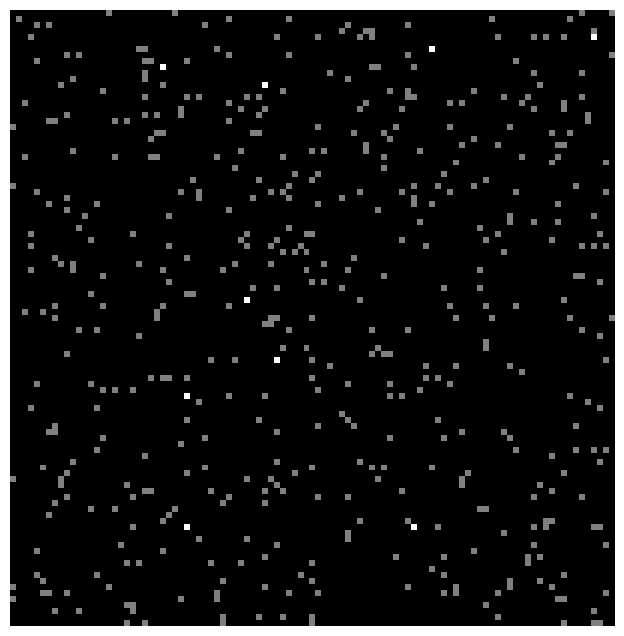

In [328]:
while gs not in hist or gs in exc:
    hist.append(gs)
    cnt += 1
    gs,g = _build_grid(dat, cnt, w, h)
print(cnt)
print(hist.index(gs))
#print(hist[hist.index(gs)])
_save(gs)
exc = _load_exc()
_image(g)

Exploration didn't yield much

Let's think of something else.

If the robots are displayed as a chirstmas tree, there must be a diagonal on the grid ?

In [64]:
#dat, w, h  = exmp, 11, 7
dat, w, h  = data, 101, 103 
cnt = 0 
pat = [1 if i == w//2 else 0 for i in range(w)]
gs,g = _build_grid(dat, cnt, w, h)
assert len(g[0]) == len(pat)
while g[0] != pat:
    #hist.append(gs)
    cnt += 1
    gs,g = _build_grid(dat, cnt, w, h)

In [66]:
# I can't be doing exact matching as it says "most" of the robots, not all...

0it [00:00, ?it/s]

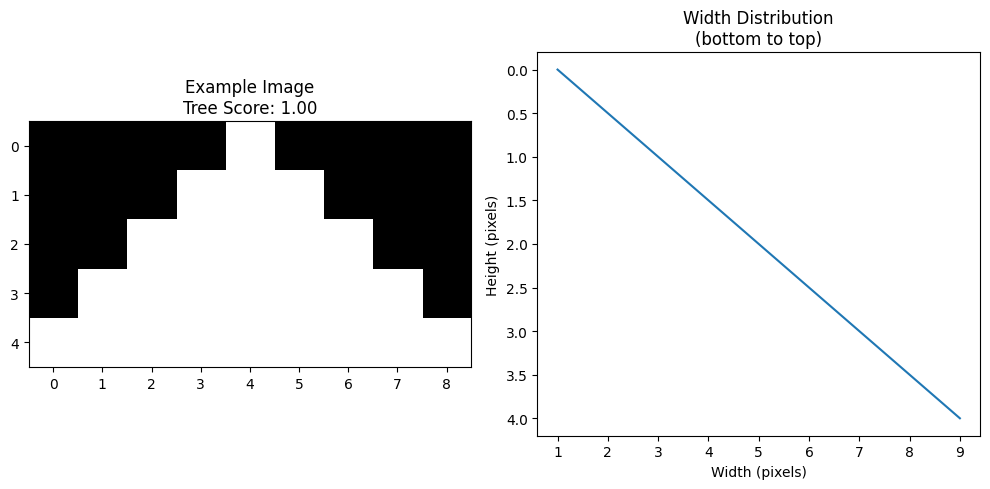

1it [00:00,  5.56it/s]

Tree score: 1.0


In [355]:
from tqdm import tqdm 
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def detect_christmas_trees(images_list, display_example=True):
    """
    Detect potential Christmas trees in a list of list of lists (3D list) of integers
    """
    def analyze_single_image(img_list):
        # Convert list to numpy array
        img = np.array(img_list)
        height, width = img.shape
        
        # Check vertical symmetry
        flipped = np.fliplr(img)
        symmetry_score = np.sum(img == flipped) / (height * width)
        
        # Check triangle-like shape
        rows_with_pixels = np.sum(img, axis=1)
        if len(rows_with_pixels) < 3:
            return 0
            
        # Calculate width at different heights
        top_third = np.mean(rows_with_pixels[:height//3])
        bottom_third = np.mean(rows_with_pixels[-height//3:])
        
        # Triangle shape score (bottom should be wider than top)
        shape_score = bottom_third > (1.5 * top_third)
        
        # Get connected components
        labeled, num = ndimage.label(img)
        if num == 0:
            return 0
        
        # Calculate height/width ratio
        pixels = np.where(img > 0)
        if len(pixels[0]) == 0:
            return 0
        
        min_row, max_row = np.min(pixels[0]), np.max(pixels[0])
        min_col, max_col = np.min(pixels[1]), np.max(pixels[1])
        
        height = max_row - min_row
        width = max_col - min_col
        if height == 0 or width == 0:
            return 0
            
        aspect_ratio = height / width
        aspect_score = 0.4 < aspect_ratio < 2.0
        
        # Combine scores
        final_score = (symmetry_score > 0.8) and shape_score and aspect_score
        return float(final_score)
    
    # Convert list of images to numpy array if it isn't already
    if not isinstance(images_list, np.ndarray):
        images_list = [np.array(img) for img in images_list]
    
    # Process all images
    scores = []
    for i, img in tqdm(enumerate(images_list)):
        score = analyze_single_image(img)
        scores.append(score)
        
        # Display an example if requested
        if display_example and i == 0:
            plt.figure(figsize=(10, 5))
            plt.subplot(121)
            plt.imshow(img, cmap='binary_r')
            plt.title(f'Example Image\nTree Score: {score:.2f}')
            
            # Show width distribution
            plt.subplot(122)
            rows_with_pixels = np.sum(img, axis=1)
            plt.plot(rows_with_pixels, range(len(rows_with_pixels)))
            plt.title('Width Distribution\n(bottom to top)')
            plt.xlabel('Width (pixels)')
            plt.ylabel('Height (pixels)')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
    
    return scores

# Example usage:
example_image = [
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1]
]

# For a single image
score = detect_christmas_trees([example_image])
print(f"Tree score: {score[0]}")

In [351]:
#dat, w, h  = exmp, 11, 7
dat, w, h  = data, 101, 103 
pe = Path('exc.txt')
if pe.exists():
    pe.unlink()
hist = []
hist_g = []
exc = _load_exc()
cnt = 0 
gs,g = _build_grid(dat, cnt, w, h)

10403
0


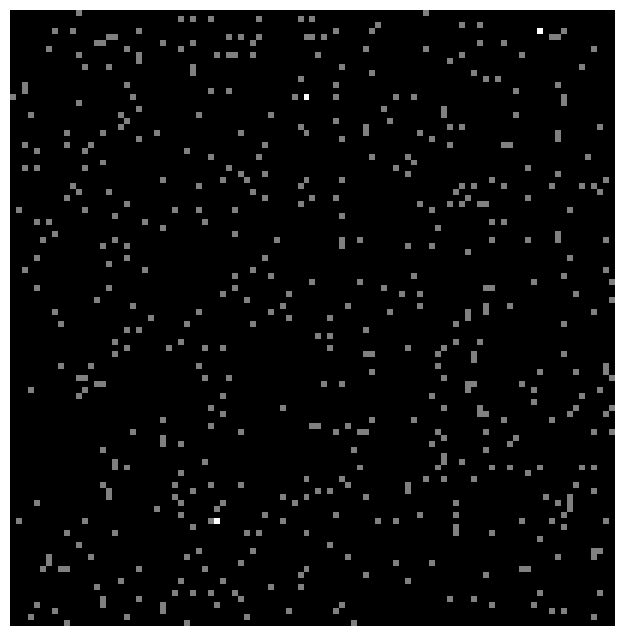

In [352]:
while gs not in hist or gs in exc:
    hist.append(gs)
    hist_g.append(g)
    cnt += 1
    gs,g = _build_grid(dat, cnt, w, h)
print(cnt)
print(hist.index(gs))
#print(hist[hist.index(gs)])
_save(gs)
exc = _load_exc()
_image(g)

In [356]:
len(hist_g)

10403

In [358]:
e1 = hist_g[0]
scores = detect_christmas_trees(hist_g, display_example=False)

10403it [00:01, 7833.96it/s]


In [360]:
[x for x in scores if x!= 0]

[]

In [384]:
import torch
from torchvision.models import resnet18
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

def detect_trees(binary_images_lists):
    """
    Detect trees in binary images (as lists of lists of ints)
    using pre-trained ResNet18
    """
    # Load pre-trained ResNet
    model = resnet18(pretrained=True)
    model.eval()
    
    # Define image transformation
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])
    
    def prepare_image(binary_image_list):
        # Convert list to numpy array
        binary_array = np.array(binary_image_list)
        
        # Convert to RGB-like format
        rgb_image = np.stack([binary_array] * 3, axis=-1)
        
        # Convert to PIL Image
        image = Image.fromarray((rgb_image * 255).astype(np.uint8))
        
        # Apply transformations
        image = transform(image)
        return image.unsqueeze(0)
    
    # Classes related to trees in ImageNet
    tree_related_classes = {
        970: 'christmas_tree',
        972: 'pine',
        973: 'spruce'
    }
    
    results = []
    confidences = []
    
    with torch.no_grad():
        for binary_image_list in tqdm(binary_images_lists):
            # Prepare and run through model
            img = prepare_image(binary_image_list)
            output = model(img)
            
            # Get probabilities
            probs = torch.nn.functional.softmax(output[0], dim=0)
            
            # Sum probabilities of tree-related classes
            tree_prob = sum(probs[idx].item() for idx in tree_related_classes)
            
            # Consider it a tree if probability exceeds threshold
            is_tree = tree_prob > 0.1  # You can adjust this threshold
            results.append(is_tree)
            confidences.append(tree_prob)
            if is_tree: break
            
    return np.array(results), np.array(confidences)

In [375]:
example_image = [
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1]
]

# Test with a single image
results, confidences = detect_trees([example_image])
print(f"Tree detected: {results[0]} (confidence: {confidences[0]:.2%})")

100%|██████████| 1/1 [00:00<00:00, 23.41it/s]

Tree detected: False (confidence: 0.05%)


In [382]:
results, confidences = detect_trees(hist_g[:100])

100%|██████████| 100/100 [00:03<00:00, 31.39it/s]


I'm going too far. Let's try something else, like finding images with a vertical ax of symmetry

In [389]:
def check_symmetry(g):
        w, h = len(g[0]), len(g)
        for y in range(h):
            for x in range(w//2):
                if g[y][x] != g[y][w-1-x]:
                    return False
        return True

In [393]:
len(hist_g)

10403

In [396]:
ss = [check_symmetry(g) for g in hist_g]
[s for s in ss if s]

[]

In [462]:
def find_symmetry_axis(grid, error_threshold=0.1):
    height, width = len(grid), len(grid[0])
    # Only check middle third of grid for potential axis
    for center in range(width//3, 2*width//3):
        errors = sum(
            grid[y][center-offset] != grid[y][center+offset]
            for y in range(height)
            for offset in range(min(center, width-1-center))
        )
        cells_compared = height * min(center, width-1-center)
        if cells_compared > 0 and errors/cells_compared <= error_threshold:
            return center
    return None

In [463]:
example_image = [
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,1,1,1,1,1,0,0],
    [0,1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,1,1]
]
find_symmetry_axis(example_image)

4

In [469]:
th = 0.05
smm = [find_symmetry_axis(g, th) for g in tqdm(hist_g)]
print(len(smm))
set(smm)

100%|██████████| 10403/10403 [01:18<00:00, 133.01it/s]

10403


{61, None}

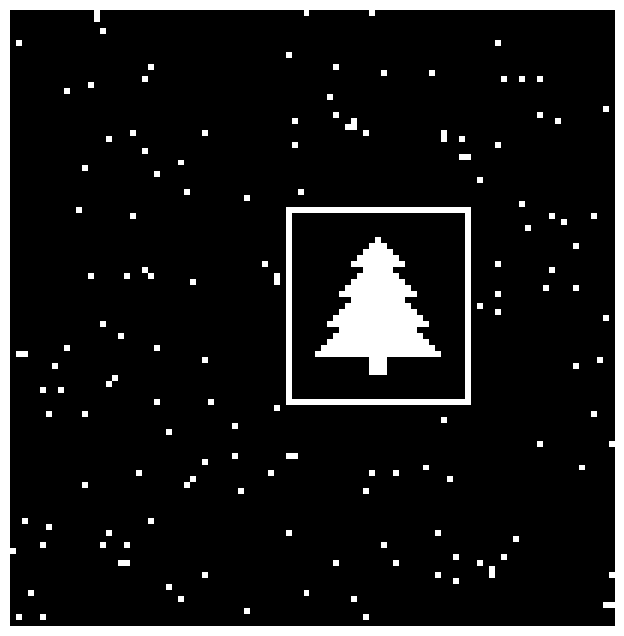

In [476]:
im = hist_g[smm.index(61)]
_image(im)

In [477]:
smm.index(61)

6243

Finding the solution was a bit of luck...

How could I have found it otherwise ?

I'm looking for a vertical ax of symmetry

But how do I characterize LOCAL symmetry ? Over an unknown width/height of pixels ?

Maybe my solution of finding a general ax of symmetry while allowing for some "noise" is the best approach

